In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('tain.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
data = pd.read_csv('train.csv')
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


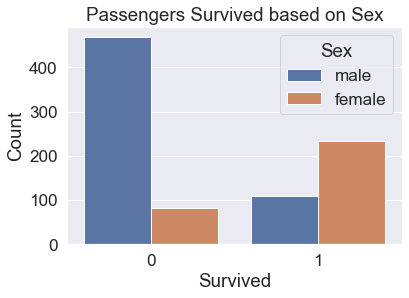

In [166]:
sns.countplot(x='Survived', hue='Sex', data=data).set(title="Passengers Survived based on Sex", ylabel="Count");

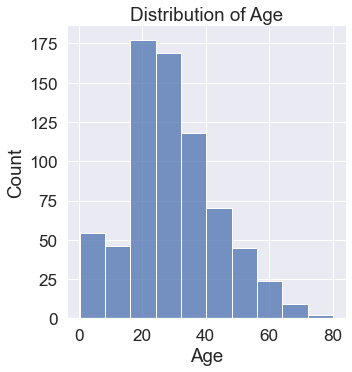

In [167]:
sns.displot(data['Age'], kde=False, bins=10).set(title="Distribution of Age")

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [169]:
x = data.drop(['Survived', 'PassengerId'], axis = 1)
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.
['gender_submission.csv', 'test.csv', 'train.csv']

['gender_submission.csv', 'test.csv', 'train.csv']

In [171]:
df_train = pd.read_csv("train.csv")

In [172]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [174]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [175]:
df_train[df_train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [176]:
df_train[df_train['Fare'] == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


In [177]:
df_train[df_train['Age'] < 5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


In [178]:
df_train[df_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [179]:
df_train[df_train['Name'] == '']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [180]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import re
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

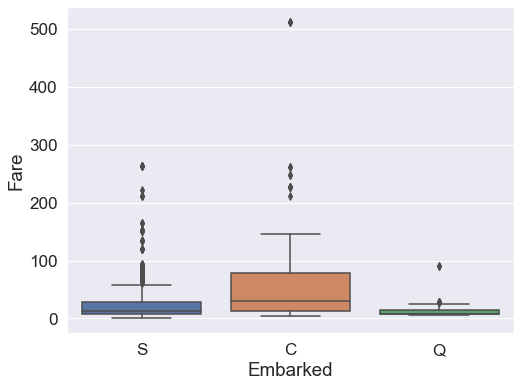

In [181]:
data = pd.concat([df_train['Fare'], df_train['Embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Embarked', y="Fare", data=data)

In [182]:
df_train[df_train['Fare']>500] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Text(0.5, 1.0, 'Total Missing Value (%)')

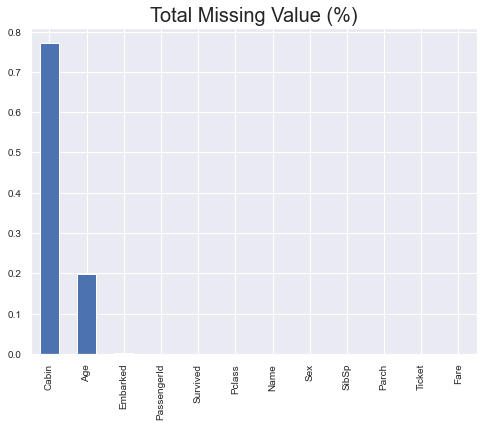

In [183]:
#histogram
#missing_data = missing_data.head(20)

#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [184]:
(df_train.isnull().sum()/df_train.isnull().count())

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [185]:
adsf = df_train.isnull()

Text(0.5, 1.0, 'Correlation with Missing Values')

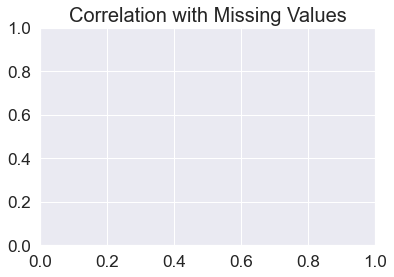

In [186]:

missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
df_train[missingdata_df], figsize=(8,6)
plt.title("Correlation with Missing Values", fontsize = 20)

In [187]:
df_train['hasCabin'] = df_train['Cabin'].isnull().apply(lambda x: 0 if x == True else 1)
df_train['hasAge'] = df_train['Age'].isnull().apply(lambda x: 0 if x == True else 1)

In [188]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,hasAge
0,1,0,3,"Braund, Mr. Owen Harris",male,8,1,0,A/5 21171,7.2500,8,8,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,8,1,0,PC 17599,71.2833,8,8,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,8,0,0,STON/O2. 3101282,7.9250,8,8,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,8,1,0,113803,53.1000,8,8,1,1
4,5,0,3,"Allen, Mr. William Henry",male,8,0,0,373450,8.0500,8,8,1,1


In [189]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,hasCabin,hasAge
PassengerId,1.000000,-0.005007,-0.035144,NaN,-0.057527,-0.001652,0.012658,NaN,NaN,NaN,NaN
Survived,-0.005007,1.000000,-0.338481,NaN,-0.035322,0.081629,0.257307,NaN,NaN,NaN,NaN
Pclass,-0.035144,-0.338481,1.000000,NaN,0.083081,0.018443,-0.549500,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,-0.057527,-0.035322,0.083081,NaN,1.000000,0.414838,0.159651,NaN,NaN,NaN,NaN
Parch,-0.001652,0.081629,0.018443,NaN,0.414838,1.000000,0.216225,NaN,NaN,NaN,NaN
Fare,0.012658,0.257307,-0.549500,NaN,0.159651,0.216225,1.000000,NaN,NaN,NaN,NaN
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hasCabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


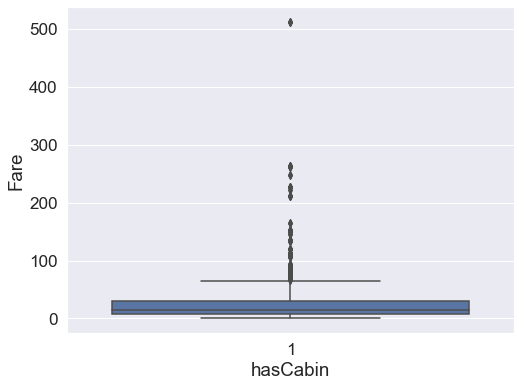

In [190]:
data = pd.concat([df_train['Fare'], df_train['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y="Fare", data=data)

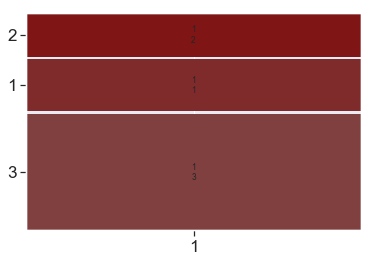

In [191]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df_train, ['hasCabin', 'Pclass'],gap=0.02)
plt.show()

In [192]:
df_train[df_train['Embarked'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,hasAge


In [193]:
df_train.shape[0]

891

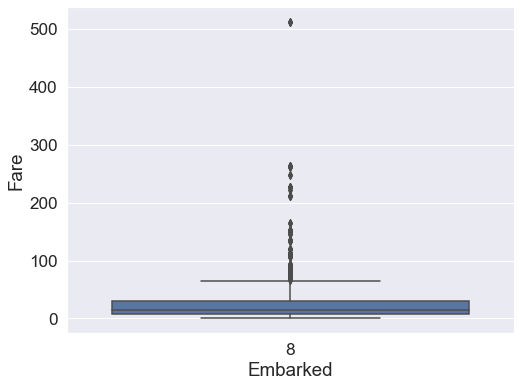

In [194]:
data = pd.concat([df_train['Fare'], df_train['Embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Embarked', y="Fare", data=data)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

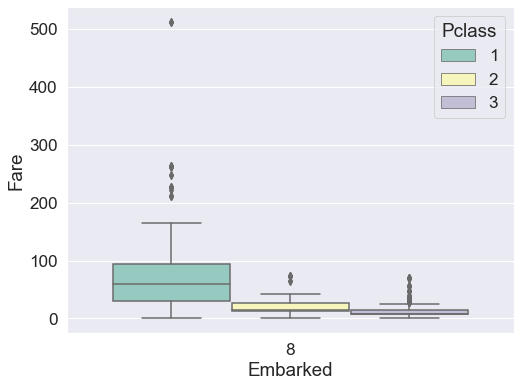

In [195]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",
               data=df_train, palette="Set3")

In [196]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,hasAge


In [197]:
df_train.loc[61, 'Embarked'] = 'S'
df_train.loc[829, 'Embarked'] = 'S'
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [198]:
df_train.groupby(['Embarked', 'Pclass'])['Fare'].agg({'median'})

median
Embarked Pclass         
8        1       58.6896
         2       14.2500
         3        8.0500
S        1       80.0000

In [199]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from pathlib import Path

In [200]:
print("Datasets")

dtrain=pd.read_csv('train.csv')
dtest=pd.read_csv('test.csv')
print()
print("#"*30)
print("Description")

print(f"Shape Dtrain:{dtrain.shape}")
print(f"Shape Dtest: {dtest.shape}")
print()
print("#"*30)

print("Info")
print("Dataset:Train")
print(dtrain.info())
print("#"*30)
print("Dataset:Test")        
print(dtest.info())

Datasets

##############################
Description
Shape Dtrain:(891, 12)
Shape Dtest: (418, 11)

##############################
Info
Dataset:Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
##############################
Dataset:Test
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [201]:
dtrain.head()
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [202]:
print("Unique elements per column")
dtrain.nunique()
print()
print("Missing Values?")
dtrain.isnull().sum()

Unique elements per column

Missing Values?


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [203]:
print("Example 1:Normal Version")
('abatement','abatement of pollution')
print("Example 2:Without stopwords")
('abatement','abatement pollution')
print("Expected Value: 0.50")

Example 1:Normal Version
Example 2:Without stopwords
Expected Value: 0.50


In [204]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [205]:
data= pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

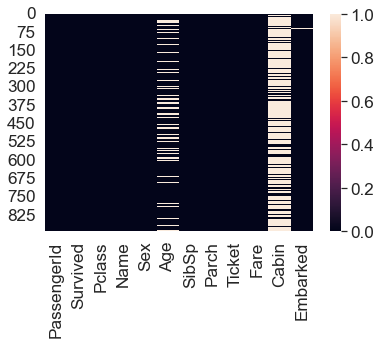

In [207]:
import seaborn as sns
sns.heatmap(data.isnull())

In [208]:
data.Age=data.Age.fillna(0)

In [209]:
data.Cabin=data.Cabin.fillna(0)

In [210]:
data.Embarked=data.Embarked.fillna(0)

In [211]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [212]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [213]:
data=data.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [214]:
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,0.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [215]:
data['Sex'].replace('female',0,inplace=True)
data['Sex'].replace('male',1,inplace=True)

In [216]:
data['Embarked_S']=data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
data['Embarked_C']=data['Embarked'].replace('Q',0).replace('S',0).replace('C',1)
data['Embarked_Q']=data['Embarked'].replace('S',0).replace('C',0).replace('Q',1)

In [217]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,7.2500,S,1,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,1,0
2,1,3,0,26.0,0,0,7.9250,S,1,0,0
3,1,1,0,35.0,1,0,53.1000,S,1,0,0
4,0,3,1,35.0,0,0,8.0500,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1,0,0
887,1,1,0,19.0,0,0,30.0000,S,1,0,0
888,0,3,0,0.0,1,2,23.4500,S,1,0,0
889,1,1,1,26.0,0,0,30.0000,C,0,1,0


In [218]:
data=data.drop(columns=['Embarked'])

In [219]:
x=data.iloc[:,0:12]

In [220]:
x=data.drop(columns=['Survived'])

In [221]:
y=data['Survived']

In [222]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,7.2500,1,0,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1,0,0
887,1,0,19.0,0,0,30.0000,1,0,0
888,3,0,0.0,1,2,23.4500,1,0,0
889,1,1,26.0,0,0,30.0000,0,1,0


In [223]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.3)

In [225]:
num_col=[0,1,2,3,4,5,6,7,8]

In [226]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer ((StandardScaler(),num_col),
                                 remainder= 'passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8])])

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
model = KNeighborsClassifier(11)
pipe=make_pipeline(trans,model)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [228]:
model

KNeighborsClassifier(n_neighbors=11)

In [229]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [230]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [231]:
pred = pipe.predict(x_test)
pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

81.34328358208955

<AxesSubplot:xlabel='Survived', ylabel='count'>

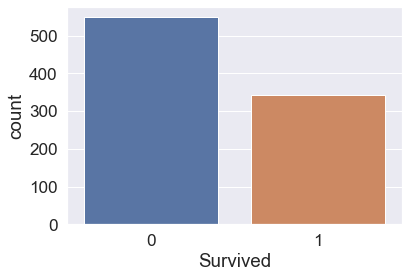

In [233]:
import seaborn as sns
sns.countplot(y)

In [234]:
data1=pd.read_csv('test.csv')
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [235]:
data1 = data1.drop(columns=['Cabin','Name','Ticket'])

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt



In [237]:
df=pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
df.shape

(891, 12)

In [239]:
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [240]:
df.duplicated().sum()

0

In [241]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:
#checking null value 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [243]:
# let see the data describe
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [244]:
df['Total']=df.sum(axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,34.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,114.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,40.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,95.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,51.0500


In [245]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set(font_scale=1.56)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
# loading data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_data = df_train.append(df_test)
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [246]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [247]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [248]:
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


,Sex,Survived
0,female,0.742038
1,male,0.188908


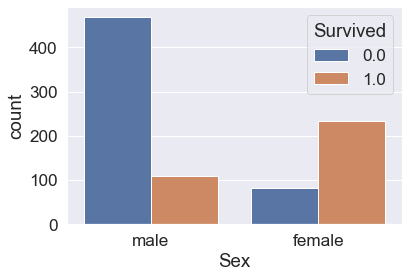

In [251]:
sns.countplot(df_data['Sex'],hue=df_data['Survived'])
display(df_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


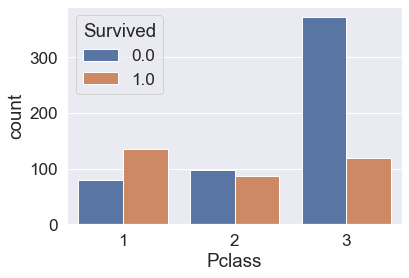

In [252]:
sns.countplot(df_data['Pclass'], hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()

In [253]:
df_data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 1309, dtype: int64

In [254]:
df_data['Sex_Code']=df_data['Sex'].astype('category').cat.codes

In [255]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

In [256]:
X = df_train.drop(labels = ['Survived','PassengerId'], axis = 1)
Y = df_train['Survived']

In [257]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [258]:
Base = ['Pclass','Sex_Code']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.73176


In [259]:
dff= pd.crosstab(df_data['Fare'],df_data['Pclass'])
display(dff)

Pclass,1,2,3
Fare,,,
0.0000,7,6,4
3.1708,0,0,1
4.0125,0,0,1
5.0000,1,0,0
6.2375,0,0,1
...,...,...,...
227.5250,5,0,0
247.5208,3,0,0
262.3750,7,0,0


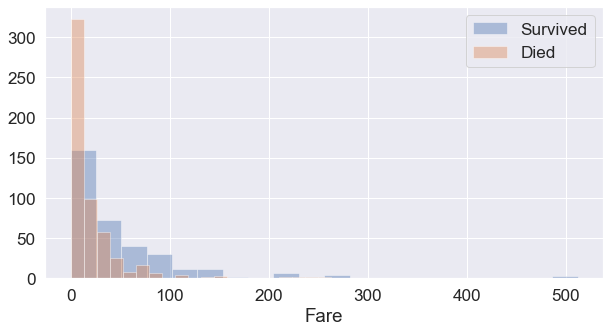

In [260]:
fig, ax = plt.subplots( figsize=(10,5))
Survived=df_data.Survived==1
Died=df_data.Survived==0
ax = sns.distplot(df_data.loc[Survived,'Fare'], kde= False, bins=20, norm_hist=False, label='Survived')
ax = sns.distplot(df_data.loc[Died,'Fare'], kde= False, bins=20, norm_hist=False, label='Died')
ax.legend()

Fare        
Survived     0.0     1.0
Pclass                  
1         64.684  95.608
2         19.412  22.056
3         13.669  13.695

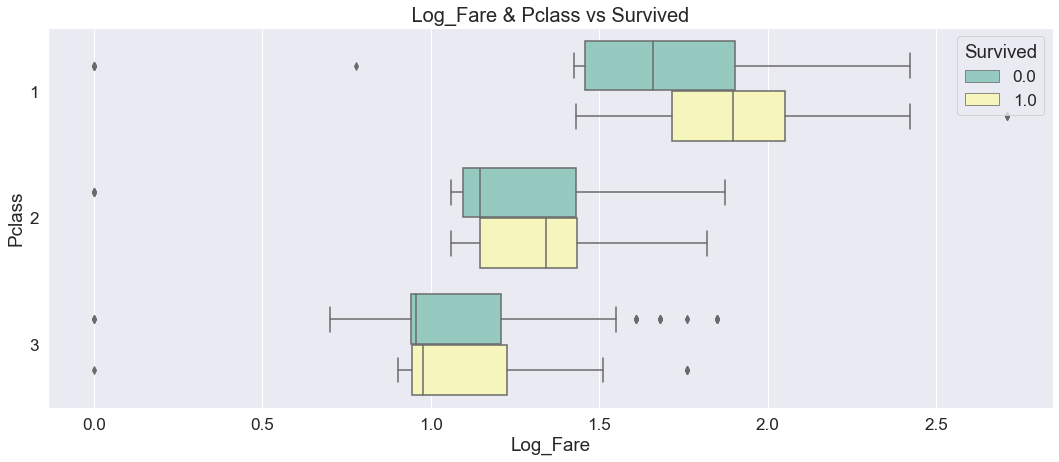

In [261]:
fig, ax = plt.subplots( figsize = (18,7) )
df_data['Log_Fare'] = (df_data['Fare']+1).map( lambda x: np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=df_data, orient='h',ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(df_data, values= ['Fare'], index = ['Pclass'], columns= ['Survived']).round(3)

In [262]:
df_data['Fare']=df_data['Fare'].fillna(df_data['Fare'].median())

In [263]:
df_data['Fare_Code'] = pd.qcut(df_data['Fare'], 5)
label = LabelEncoder()
df_data['Fare_Code'] = label.fit_transform(df_data['Fare_Code'])
pd.crosstab(df_data['Fare_Code'],df_data['Pclass'])

Pclass,1,2,3
Fare_Code,,,
0,8,6,261
1,0,36,218
2,0,124,132
3,95,99,71
4,220,12,27


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


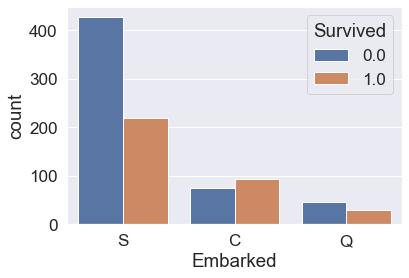

In [264]:
df_data['Embarked']=df_data['Embarked'].fillna('S') 
sns.countplot(df_data['Embarked'],hue=df_data['Survived'])
df_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

In [265]:
df_data['Embarked_Code']=df_data['Embarked'].astype('category').cat.codes 

In [266]:
df_train=df_data[:len(df_train)]
df_test=df_data[len(df_train):]
X=df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y=df_train['Survived']
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_Code', 'Log_Fare', 'Fare_Code',
       'Embarked_Code'],
      dtype='object')

In [267]:
Features=['Pclass','Sex_Code','Fare_Code','Embarked_Code']
Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Model.fit(X[Features],Y)
print("oob_score: %.5f" %(Model.oob_score_))

oob_score: 0.81257


In [268]:
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df_data['Title'], df_data['Sex']).T

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [269]:
df_data['Title'] = df_data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
     'Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],'Rare')
    
df_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().round(3)

,Title,Survived
0,Master,0.575
1,Miss,0.698
2,Mr,0.157
3,Mrs,0.792
4,Rare,0.444


In [270]:
df_data.groupby(['Title'])['Age'].mean().round(3)

Title
Master     5.483
Miss      21.774
Mr        32.252
Mrs       36.994
Rare      42.656
Name: Age, dtype: float64

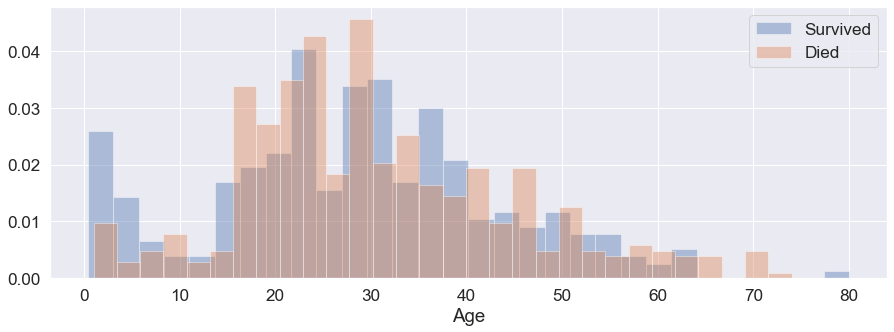

In [271]:
fig, ax = plt.subplots(figsize=[15,5])
ax =  sns.distplot(df_data.loc[Survived,'Age'], kde=False,norm_hist=True,bins=30,label='Survived')
ax =  sns.distplot(df_data.loc[Died,'Age'], kde=False,norm_hist=True,bins=30,label='Died')
ax.legend()

Sex,female,male
Age_NotNull,,
0,78,185
1,388,658


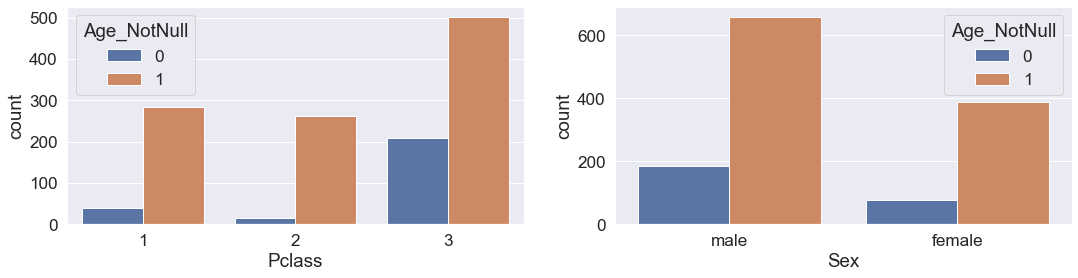

In [272]:
df_data['Age_NotNull']=df_data['Age'].isnull().map(lambda x: 0 if x == True else 1)
fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_figwidth(18)
ax1 = sns.countplot(df_data['Pclass'], hue=df_data['Age_NotNull'], ax=ax1)
ax2 = sns.countplot(df_data['Sex'], hue=df_data['Age_NotNull'], ax=ax2)
pd.crosstab(df_data['Age_NotNull'],df_data['Sex']).round(3)

Text(0.5, 1.0, 'Age vs Survived in Pclass1 1 & 2')

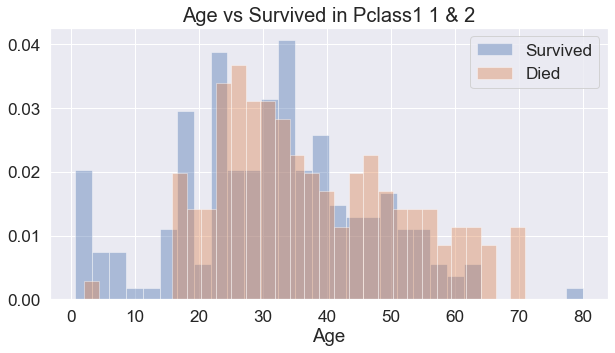

In [273]:
AP_Survived=((df_data.Age_NotNull == 1)&(df_data.Pclass != 3)&(df_data.Survived == 1))
AP_Died=((df_data.Age_NotNull == 1) & (df_data.Pclass != 3) & (df_data.Survived == 0))
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(df_data.loc[AP_Survived,'Age'], kde=False,bins=30,norm_hist=True,label='Survived')
ax = sns.distplot(df_data.loc[AP_Died,'Age'], kde=False,bins=30,norm_hist=True,label='Died')
ax.legend()
ax.set_title('Age vs Survived in Pclass1 1 & 2',fontsize=20)

In [274]:
T=df_data.groupby(['Title'])['Age'].mean().round(3).values
T

array([ 5.483, 21.774, 32.252, 36.994, 42.656])

In [275]:
df_data['Title_Code']=df_data['Title'].astype('category').cat.codes

In [276]:
Ti_pred = df_data.groupby('Title')['Age'].mean().values
df_data['Ti_Age'] = df_data['Age']

for i in range(len(df_data['Title_Code'].unique())):
    df_data.loc[(df_data.Age.isnull()) & (df_data.Title_Code == i),'Ti_Age'] = Ti_pred[i]
    
df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')

df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 18.0) * 1


In [277]:
df_train=df_data[:len(df_train)]
df_test=df_data[len(df_train):]
X=df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y=df_train['Survived']
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_Code', 'Log_Fare', 'Fare_Code',
       'Embarked_Code', 'Title', 'Age_NotNull', 'Title_Code', 'Ti_Age',
       'Ti_Minor'],
      dtype='object')

In [278]:
Features=['Pclass','Sex_Code','Fare_Code','Embarked_Code','Ti_Minor']
Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Model.fit(X[Features],Y)
print("oob_score: %.5f" %(Model.oob_score_))

oob_score: 0.82492


In [279]:
df_data['Family_Size']=df_data['SibSp']+df_data['Parch']+1

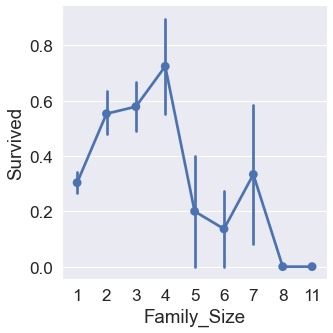

In [280]:
g = sns.factorplot(data=df_data,x='Family_Size', y ='Survived')

Survived                                                   
Family_Size       1      2      3      4     5      6      7    8    11
Sex                                                                    
female         0.786  0.816  0.776  0.842  0.25  0.375  0.375  0.0  0.0
male           0.156  0.243  0.396  0.500  0.00  0.000  0.250  0.0  0.0

Family_Size,1,2,3,4,5,6,7,8,11
Sex,,,,,,,,,
female,194,123,79,29,14,10,9,3,5
male,596,112,80,14,8,15,7,5,6


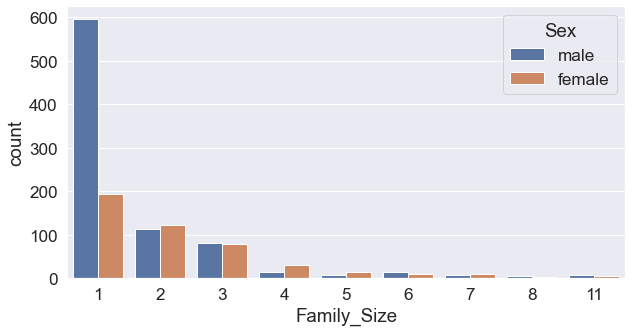

In [281]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df_data['Family_Size'], hue=df_data['Sex'])
piv=pd.pivot_table(df_data, values= ['Survived'], index = ['Sex'], columns= ['Family_Size']).round(3)
display(piv)
cross=pd.crosstab(df_data['Sex'],df_data['Family_Size'])
display(cross)

In [282]:
df_data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [283]:
deplicate_ticket=[]
for tk in df_data.Ticket.unique():
    tem = df_data.loc[df_data.Ticket == tk, 'Fare']
    #print(tem)
    if tem.count() > 1:
        deplicate_ticket.append(df_data.loc[df_data.Ticket == tk, ['Name','Ticket','Fare','Cabin','Family_Size','Survived']])

deplicate_ticket = pd.concat(deplicate_ticket)

deplicate_ticket.head(16)

,Name,Ticket,Fare,Cabin,Family_Size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
234,"Cumings, Mr. John Bradley",PC 17599,71.2833,C85,2,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
146,"Hilliard, Mr. Herbert Henry",17463,51.8625,E46,1,NaN
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [284]:
df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_Size == 1) & (deplicate_ticket.Survived.notnull())].head(7)
df_fam = deplicate_ticket.loc[(deplicate_ticket.Family_Size > 1) & (deplicate_ticket.Survived.notnull())].head(7)
print("People keep the same ticket: %.0f" %len(deplicate_ticket))
print("Friends: %.0f" %len(deplicate_ticket.loc[deplicate_ticket.Family_Size == 1]))
print("Family: %.0f" %len(deplicate_ticket.loc[deplicate_ticket.Family_Size > 1]))
display(df_fri,df_fam)

People keep the same ticket: 596
Friends: 127
Family: 469


,Name,Ticket,Fare,Cabin,Family_Size,Survived
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
20,"Fynney, Mr. Joseph J",239865,26.0000,NaN,1,0.0
791,"Gaskell, Mr. Alfred",239865,26.0000,NaN,1,0.0
195,"Lurette, Miss. Elise",PC 17569,146.5208,B80,1,1.0
681,"Hassab, Mr. Hammad",PC 17572,76.7292,D49,1,1.0
61,"Icard, Miss. Amelie",113572,80.0000,B28,1,1.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,80.0000,B28,1,1.0


,Name,Ticket,Fare,Cabin,Family_Size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [285]:
df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_Size == 1) & (deplicate_ticket.Ticket =='PC 17572')]
df_fam = deplicate_ticket.loc[(deplicate_ticket.Family_Size > 1) & (deplicate_ticket.Ticket =='PC 17572')]
display(df_fri.head(5),df_fam.head(5))

,Name,Ticket,Fare,Cabin,Family_Size,Survived
681,"Hassab, Mr. Hammad",PC 17572,76.7292,D49,1,1.0


,Name,Ticket,Fare,Cabin,Family_Size,Survived
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",PC 17572,76.7292,D33,2,1.0
645,"Harper, Mr. Henry Sleeper",PC 17572,76.7292,D33,2,1.0


In [286]:
df_data.groupby(['Ticket'])['Survived'].mean().round(3)

Ticket
110152         1.000
110413         0.667
110465         0.000
110469           NaN
110489           NaN
               ...  
W./C. 6608     0.000
W./C. 6609     0.000
W.E.P. 5734    0.000
W/C 14208      0.000
WE/P 5735      0.500
Name: Survived, Length: 929, dtype: float64

In [287]:
df_fri = df_data.loc[df_data.Ticket =='110413']
display(df_fri.head(5))
df_fri = df_data.loc[df_data.PassengerId ==258]
display(df_fri.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_Code,Log_Fare,Fare_Code,Embarked_Code,Title,Age_NotNull,Title_Code,Ti_Age,Ti_Minor,Family_Size
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,...,1,1.906604,4,2,Mr,1,2,52,0,3
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,...,0,1.906604,4,2,Mrs,1,3,39,0,3
585,586,1.0,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,...,0,1.906604,4,2,Miss,1,1,18,0,3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_Code,Log_Fare,Fare_Code,Embarked_Code,Title,Age_NotNull,Title_Code,Ti_Age,Ti_Minor,Family_Size
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,...,0,1.942008,4,2,Miss,1,1,30,0,1


In [288]:
df_data.loc[df_data.PassengerId==559].groupby(['Ticket'])['Survived'].mean().round(3)[0]
1.0

1.0

In [289]:
df_data['Connected_Survival'] = 0.5
for _, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            passID = row['PassengerId']
            if (smax==0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0
            elif (smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1

print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print("people have connected information : %.0f" 
      %(df_data[df_data['Connected_Survival']!=0.5].shape[0]))
df_data.groupby('Connected_Survival')[['Survived']].mean().round(3)

people keep the same ticket: 596 
people have connected information : 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [290]:
df_train=df_data[:len(df_train)]
df_test=df_data[len(df_train):]
X=df_train.drop(labels=['Survived','PassengerId','SibSp','Parch'],axis=1)
Y=df_train['Survived']
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Sex_Code', 'Log_Fare', 'Fare_Code', 'Embarked_Code', 'Title',
       'Age_NotNull', 'Title_Code', 'Ti_Age', 'Ti_Minor', 'Family_Size',
       'Connected_Survival'],
      dtype='object')

In [291]:
Features=['Pclass','Sex_Code','Embarked_Code','Ti_Minor','Connected_Survival']
Model = RandomForestClassifier(random_state=2,n_estimators=150,min_samples_split=20,oob_score=True)
Model.fit(X[Features], Y)
print('minor oob score :%.5f' %(Model.oob_score_))

minor oob score :0.84961


In [292]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

pred = Model.predict(X_Submit[Features])

submission = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":pred.astype(int)})
submission.to_csv("submission.csv",index=False)